In [1]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import cv2
from matplotlib import pyplot as plt


In [2]:
print("Loading SSD MobileNet V2 model...")
detector = hub.load("https://tfhub.dev/tensorflow/ssd_mobilenet_v2/2")
print("Model loaded successfully.")



Loading SSD MobileNet V2 model...



Model loaded successfully.


In [3]:
COCO_LABELS = {
    1: 'person', 2: 'bicycle', 3: 'car', 4: 'motorcycle',
    5: 'airplane', 6: 'bus', 7: 'train', 8: 'truck',
    9: 'boat', 10: 'traffic light', 11: 'fire hydrant',
    13: 'stop sign', 14: 'parking meter', 15: 'bench',
    16: 'bird', 17: 'cat', 18: 'dog', 19: 'horse',
    20: 'sheep', 21: 'cow', 22: 'elephant', 23: 'bear',
    24: 'zebra', 25: 'giraffe', 27: 'backpack', 28: 'umbrella',
    31: 'handbag', 32: 'tie', 33: 'suitcase', 34: 'frisbee',
    35: 'skis', 36: 'snowboard', 37: 'sports ball', 38: 'kite',
    39: 'baseball bat', 40: 'baseball glove', 41: 'skateboard',
    42: 'surfboard', 43: 'tennis racket', 44: 'bottle',
    46: 'wine glass', 47: 'cup', 48: 'fork', 49: 'knife',
    50: 'spoon', 51: 'bowl', 52: 'banana', 53: 'apple',
    54: 'sandwich', 55: 'orange', 56: 'broccoli', 57: 'carrot',
    58: 'hot dog', 59: 'pizza', 60: 'donut', 61: 'cake',
    62: 'chair', 63: 'couch', 64: 'potted plant', 65: 'bed',
    67: 'dining table', 70: 'toilet', 72: 'tv', 73: 'laptop',
    74: 'mouse', 75: 'remote', 76: 'keyboard', 77: 'cell phone',
    78: 'microwave', 79: 'oven', 80: 'toaster', 81: 'sink',
    82: 'refrigerator', 84: 'book', 85: 'clock', 86: 'vase',
    87: 'scissors', 88: 'teddy bear', 89: 'hair drier',
    90: 'toothbrush'
}


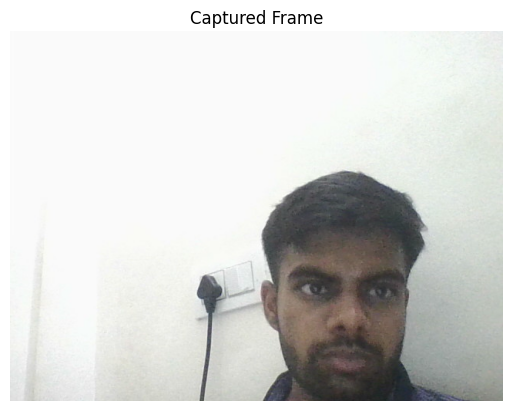

In [4]:
cap = cv2.VideoCapture(0)
ret, frame = cap.read()
cap.release()

if ret:
    # Convert BGR to RGB for displaying
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    plt.imshow(frame_rgb)
    plt.axis('off')
    plt.title("Captured Frame")
    plt.show()
else:
    print("Failed to capture frame.")


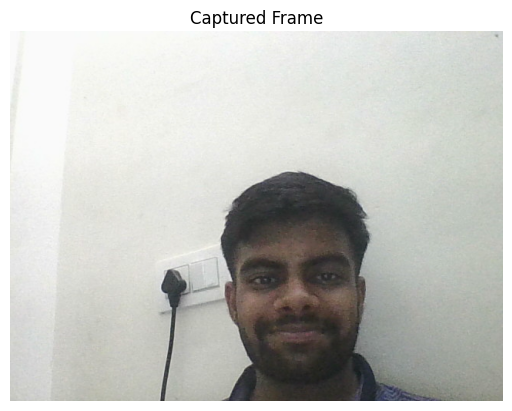

In [5]:
cap = cv2.VideoCapture(0)
ret, frame = cap.read()
cap.release()

if ret:
    # Convert BGR to RGB for displaying
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    plt.imshow(frame_rgb)
    plt.axis('off')
    plt.title("Captured Frame")
    plt.show()
else:
    print("Failed to capture frame.")


In [6]:
# Convert frame to float32 and resize to model input size (1, height, width, 3)
input_tensor = tf.convert_to_tensor([frame_rgb], dtype=tf.uint8)

# Run detection
results = detector(input_tensor)

# Extract detection details
result = {key: value.numpy() for key, value in results.items()}


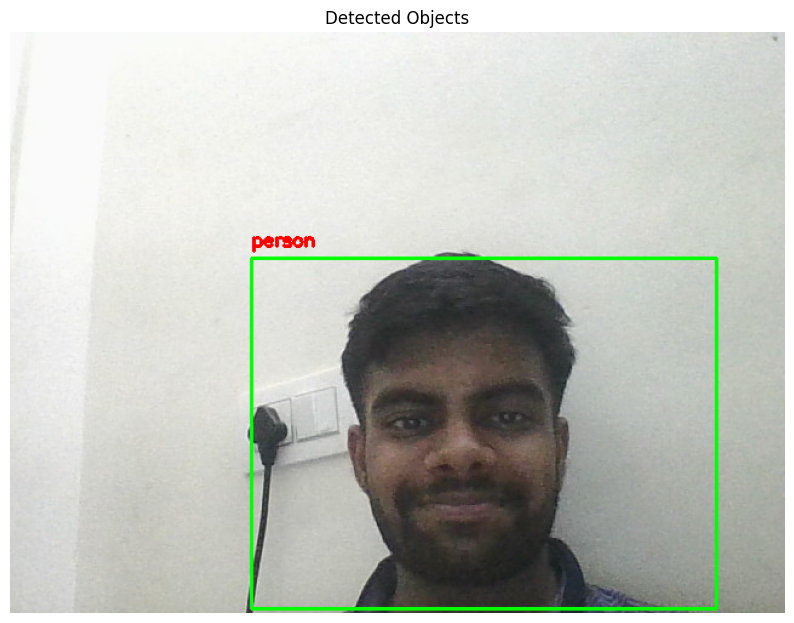

In [19]:
# Draw boxes on the frame
image_with_boxes = frame_rgb.copy()

height, width, _ = image_with_boxes.shape
for i in range(len(result["detection_scores"])):
    score = result["detection_scores"][i][0]
    if score < 0.5:
        continue

    box = np.array(result["detection_boxes"][i]).flatten()[:4]
    class_id = int(result["detection_classes"][i][0])
    label = COCO_LABELS.get(class_id, f"Class {class_id}")

    y1, x1, y2, x2 = box
    (left, top, right, bottom) = (int(x1 * width), int(y1 * height),
                                  int(x2 * width), int(y2 * height))

    cv2.rectangle(image_with_boxes, (left, top), (right, bottom), (0, 255, 0), 2)
    cv2.putText(image_with_boxes, label, (left, top - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)



# Display the result
plt.figure(figsize=(10, 8))
plt.imshow(image_with_boxes)
plt.axis('off')
plt.title("Detected Objects")
plt.show()
